# HW08 Gender embeddings


## Preparation

本次作業練習需要用到gensim套件，為避免同學在安裝套件方面花太多時間，以下提供在colab直接執行作業檔案的方法及說明。

*   方法一：老師原本設計的方式
  *   請同學自行下載檔案並在本機環境執行作業檔案
  *   如果碰到問題可以先就錯誤訊息到Google或其他平台上找答案，若真的無法解決再請同學到社團或NTU COOL問我們
*   方法二：將資料下載到colab的環境
  *   執行指令並下載資料，完成後直接進行作業下一個步驟（loading data）
*   方法三：將資料下載到自己的雲端，並直接取用該雲端檔案
  *   執行指令並下載資料，完成後直接進行作業下一個步驟（loading data）
  *   使用此方法只要下載一次檔案就好，之後可以直接取用雲端檔案

### 方法一：

- Download [the embedding](https://drive.google.com/file/d/1sfOjlQ0G_LXfvdBGFhIlG0UUj55GXhew/view?usp=sharing) to your computer (Middle size, about MB)



### 方法二：



In [ ]:
# 下載資料到colab提供的環境，直接執行這一行即可

!gdown --id '1OkR_STaIYXK6-BWY5RF1eikqysvML8-8' --output CBOW_iter15_2017-2018.bin 

# 若上一個連結不能用，請用這一個備用的連結
# !gdown --id '1sfOjlQ0G_LXfvdBGFhIlG0UUj55GXhew' --output CBOW_iter15_2017-2018.bin

Downloading...
From: https://drive.google.com/uc?id=1OkR_STaIYXK6-BWY5RF1eikqysvML8-8
To: /content/CBOW_iter15_2017-2018.bin
320MB [00:01, 223MB/s]


> 如果成功，你會在左側目錄看到你的檔案


![%E6%88%AA%E5%9C%96%202021-05-22%20%E4%B8%8B%E5%8D%885.03.23.png](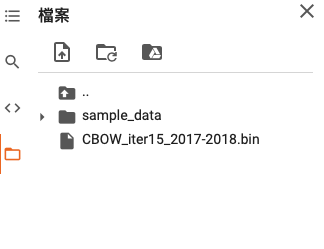
)

### 方法三：



In [12]:
# 將資料放到你的google drive
# 執行這一格並進行授權（依照網址複製授權金鑰並輸入在空格裡）
# 成功會出現「 Mounted at /content/gdrive 」

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [13]:
# 指定資料夾
import os

workspace = '1092NTU/PSS-TA/HW08'  # 填入資料夾名稱／檔案路徑，你的雲端上需先有名稱／檔案路徑相同的資料夾

try:
    os.chdir(os.path.join('/content/gdrive/My Drive/', workspace))
except:
    os.mkdir(os.path.join('/content/gdrive/My Drive/', workspace))
    os.chdir(os.path.join('/content/gdrive/My Drive/', workspace))

In [14]:
# 下載資料

!gdown --id '1OkR_STaIYXK6-BWY5RF1eikqysvML8-8' --output CBOW_iter15_2017-2018.bin 

# 備用
# !gdown --id '1sfOjlQ0G_LXfvdBGFhIlG0UUj55GXhew' --output CBOW_iter15_2017-2018.bin

Downloading...
From: https://drive.google.com/uc?id=1OkR_STaIYXK6-BWY5RF1eikqysvML8-8
To: /content/gdrive/My Drive/1092NTU/PSS-TA/HW08/CBOW_iter15_2017-2018.bin
320MB [00:02, 151MB/s]


> 成功後你會得到你的檔案路徑，之後進行作業前只要先連結（mount）你的google drive，就可以透過檔案路徑直接取用你的雲端檔案



```
# 例如我的執行結果是以下內容
# 我的檔案路徑就是：/content/gdrive/MyDrive/1092NTU/PSS-TA/HW08/CBOW_iter15_2017-2018.bin
# 需注意刪去空白格，避免出現路徑錯誤

From: https://drive.google.com/uc?id=1OkR_STaIYXK6-BWY5RF1eikqysvML8-8
To: /content/gdrive/My Drive/1092NTU/PSS-TA/HW08/CBOW_iter15_2017-2018.bin
320MB [00:02, 151MB/s]
```

## Loading data

In [2]:
from gensim.models import KeyedVectors

w2v = KeyedVectors.load_word2vec_format("CBOW_iter15_2017-2018.bin", binary = True)

# 若你使用方法三，需將此處的檔案路徑改成雲端檔案路徑，以取用雲端檔案
# w2v = KeyedVectors.load_word2vec_format("/content/gdrive/MyDrive/1092NTU/PSS-TA/HW08/CBOW_iter15_2017-2018.bin", binary = True)
print(len(w2v.index2word))

265088


# Design

## (TODO) Construct three lists
- you should list as least 30 terms for each list

In [3]:
female = ["她", "妳", "女生", "女孩"]
male = ["他", "你", "男", "男生"]
occupation = ['警察', '保母', '護士', '老闆']

### Verify your vocabulary
You can use the following code to verify if your selected words exist in the wordEmbedding model

In [4]:
for word in female+male+occupation:
    if word not in w2v.vocab:
        print(word)

# (TODO) Comparing gender stereotype of occupations 
- 你應該會有30個female words、30個male words、30個職業。
- 對於每個職業，去計算該職業和每個female words的similarity，求平均，假設為female_avg
- 對於每個職業，去計算該職業和每個male words的similarity，求平均，假設為male_avg
- 對於每個職業，印出該職業female_avg和male_avg哪個大，印的時候可以用ternary condition來判斷
```
"<" if female_avg > male_avg elase ">"
```
- Expected results
```
警察	male(0.21)	>	female(0.16)
保母	male(0.19)	<	female(0.26)
護士	male(0.30)	<	female(0.31)
老闆	male(0.30)	>	female(0.28)
```

警察	male(0.21)	>	female(0.16)
保母	male(0.19)	<	female(0.26)
護士	male(0.30)	<	female(0.31)
老闆	male(0.30)	>	female(0.28)


# (TODO) Visualization with PCA
抽取出所有上述職業和性別化稱謂的向量，以PCA進行降維後，用Bokeh做視覺化，預期視覺化結果如下：
![Unknown.png](
)

## Dimension reduction by PCA

## Constructing pandas dataframe for visualization

,x,y,label,color
0,-26.315098,-4.265126,她,red
1,-23.185083,4.461005,妳,red
2,-22.480119,25.706877,女生,red
3,-22.264492,18.956989,女孩,red
4,16.024391,-2.891161,女士,red
...,...,...,...,...
115,5.172201,3.623735,醫生,grey
116,18.513001,8.822533,領班,grey
117,12.341534,12.372184,外勞,grey
118,10.059075,0.202080,看護,grey


## Visualization by bokeh

In [ ]:
# !pip install bokeh
# !pip install jupyter_bokeh
from bokeh.models import ColumnDataSource, Label, LabelSet, Range1d
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

# Visualization with t-SNE

## Dimension reduction by t-SNE

## Visualization